## Predicting the Resell value of a car using Linear Regression

#### This notebook uses Linear Regression to predict the car's resale value. The model has been tested against the "Assumptions of Linear Regression", and evaluated using performance metrics.

The libraries that are used are: Pandas, NumPy, Seaborn, Matplotlib, Sklearn

In [1]:
# the libraries that we need
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm

In [2]:
car_resell = pd.read_csv("/Users/mahimashrestha/Downloads/archive/Car details v3.csv")

In [3]:
car_resell.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

### Exploratory Data Analysis

The exploration of the dataset begins from here:

In [4]:
car_resell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
car_resell.shape

(8128, 13)

In [6]:
nrow,cols = car_resell.shape

In [7]:
car_resell.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [8]:
car_resell.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [9]:
#checking for missing values
car_resell.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

### Summary Statistics

Summary statistics for Numerical variables:

In [10]:
car_resell.describe()

year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

Summary Statistics for object data type

In [11]:
car_resell.describe(include = object)

name    fuel seller_type transmission        owner  \
count                     8128    8128        8128         8128         8128   
unique                    2058       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       129    4402        6766         7078         5289   

          mileage   engine max_power          torque  
count        7907     7907      7913            7906  
unique        393      121       322             441  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          225     1017       377             530

#### Stats of Categorical variables

In [12]:
categorical_col = car_resell.select_dtypes(include = 'object').copy()

In [13]:
temp = []

for col in categorical_col.columns:
    temp.append({
        "Column":col,
        "Categories":categorical_col[col].unique(),
        "Value Count": len(list(categorical_col[col].unique())),
        "Value Count Without Missing": categorical_col[col].nunique(),
        "Missing Values": categorical_col[col].isnull().sum(),
        "Percent of missing" : categorical_col[col].isnull().sum()/nrow
    })

categorical_variable_stat = pd.DataFrame(temp)
categorical_variable_stat

Column                                         Categories  \
0          name  [Maruti Swift Dzire VDI, Skoda Rapid 1.5 TDI A...   
1          fuel                         [Diesel, Petrol, LPG, CNG]   
2   seller_type             [Individual, Dealer, Trustmark Dealer]   
3  transmission                                [Manual, Automatic]   
4         owner  [First Owner, Second Owner, Third Owner, Fourt...   
5       mileage  [23.4 kmpl, 21.14 kmpl, 17.7 kmpl, 23.0 kmpl, ...   
6        engine  [1248 CC, 1498 CC, 1497 CC, 1396 CC, 1298 CC, ...   
7     max_power  [74 bhp, 103.52 bhp, 78 bhp, 90 bhp, 88.2 bhp,...   
8        torque  [190Nm@ 2000rpm, 250Nm@ 1500-2500rpm, 12.7@ 2,...   

   Value Count  Value Count Without Missing  Missing Values  \
0         2058                         2058               0   
1            4                            4               0   
2            3                            3               0   
3            2                            2               0   
4            5                            5               0   
5          394                          393             221   
6          122                          121             221   
7          323                          322             215   
8          442                          441             222   

   Percent of missing  
0            0.000000  
1            0.000000  
2            0.000000  
3            0.000000  
4            0.000000  
5            0.027190  
6            0.027190  
7            0.026452  
8            0.027313

### Cleaning data

Replacing the units that are present in the dataset

In [14]:
#cleaning columns with units
car_resell['engine'] = car_resell["engine"].str.replace('CC','').astype(float)

In [15]:
#cleaning mileage
car_resell["mileage"]= car_resell["mileage"].str.replace('kmpl', '')
car_resell["mileage"]= car_resell["mileage"].str.replace('km/kg', '')
car_resell["mileage"] = pd.to_numeric(car_resell['mileage'])

In [16]:
#cleaning max power
car_resell["max_power"] = car_resell["max_power"].str.replace("bhp","")

In [17]:
car_resell["max_power"] = pd.to_numeric(car_resell['max_power'], errors = "coerce")

Extracting the torque and rpm value from torque

In [18]:
#cleaning torque
car_resell["torque"] =car_resell["torque"].astype(str).str.lower()
car_resell["torque_val"] = car_resell["torque"].str.extract(r'([\d\.]+)').astype(float)

In [19]:
#new columns torque unit
car_resell['torque_unit'] = car_resell['torque'].str.extract(r'(nm|kgm)')

In [20]:
#converting the torque kgm into nm
car_resell["torque_val"] = np.where(car_resell["torque_unit"] == 'kgm',car_resell["torque_val"]*9.80665,car_resell["torque_val"])

In [30]:
#extracting rpm

def extract_rpm(torque_str):
    if pd.isna(torque_str) : return np.nan
    
    match = re.search(r'(\d{3,5})[\-~–](\d{3,5})', torque_str)
    if match:
        return (int(match.group(1)) + int(match.group(2))) / 2
    match = re.search(r'(\d{3,5})(?=\s*rpm|\s*\)|$)', torque_str)
    if match:
        return int(match.group(1))
    
    return np.nan

car_resell['rpm'] = car_resell['torque'].apply(extract_rpm)

### Distribution of data

Checking distribution of data for normality and skewness

In [21]:
numerical_col = ["selling_price","log_selling_price","km_driven","mileage","engine","max_power","seats","torque_val","rpm"]

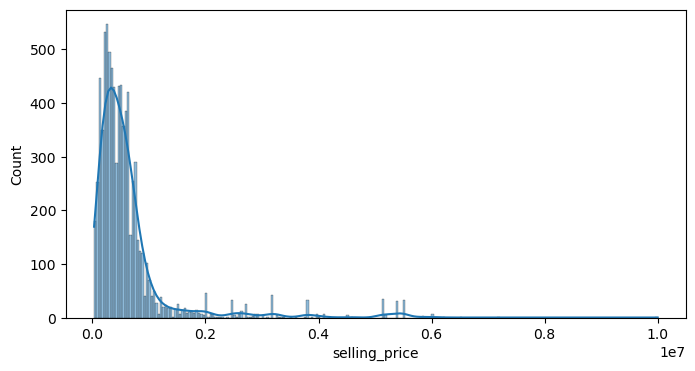

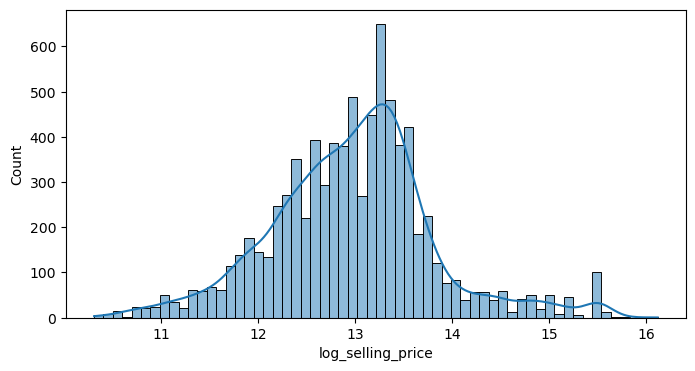

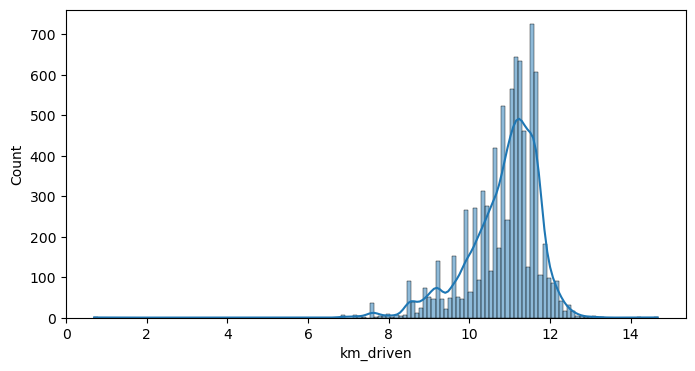

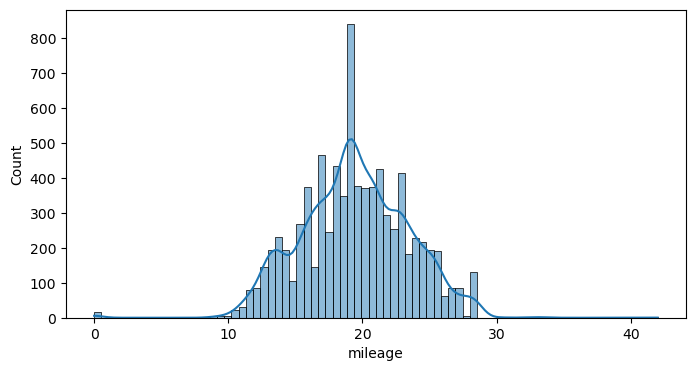

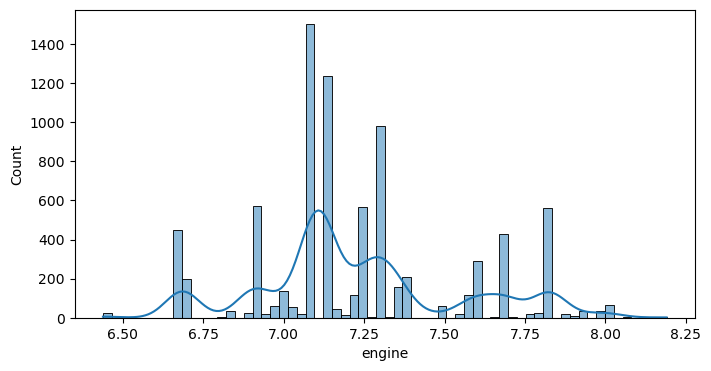

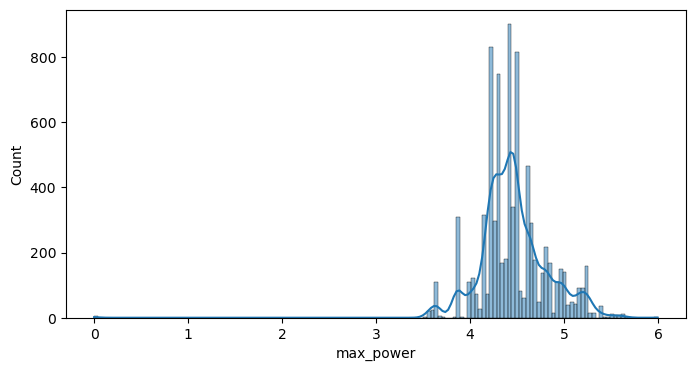

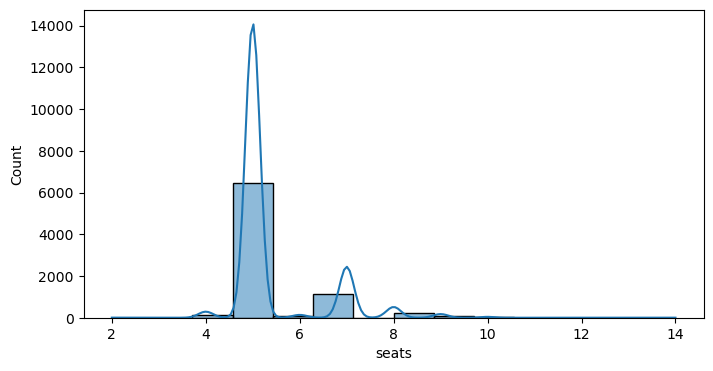

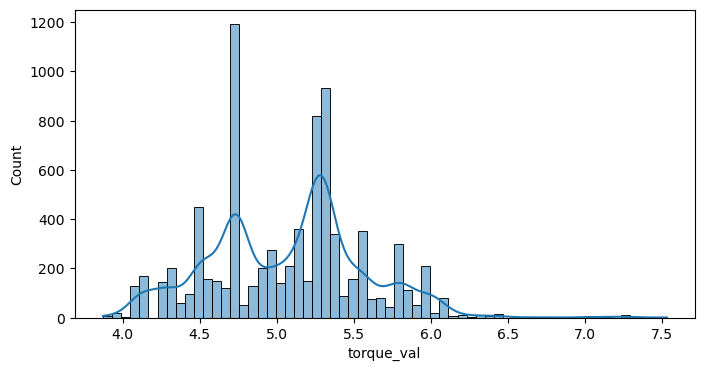

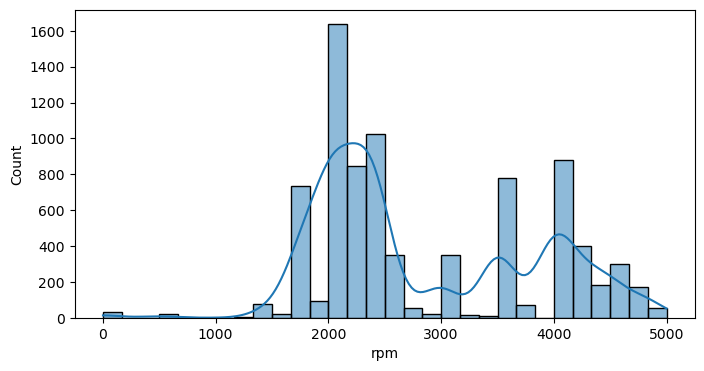

In [82]:
#histogram for distribution
for col in numerical_col:
    plt.figure(figsize = (8,4))
    sns.histplot(car_resell[col].dropna(), kde = True)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

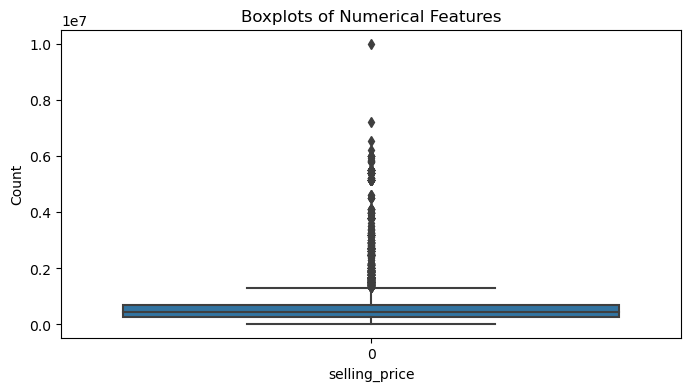

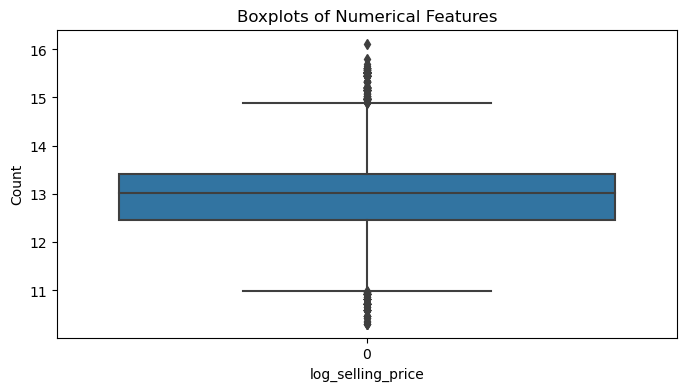

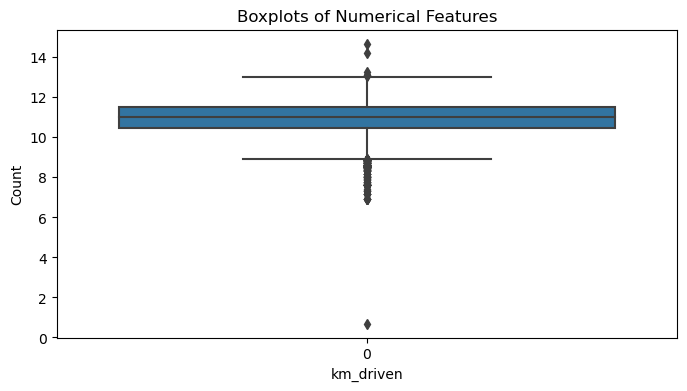

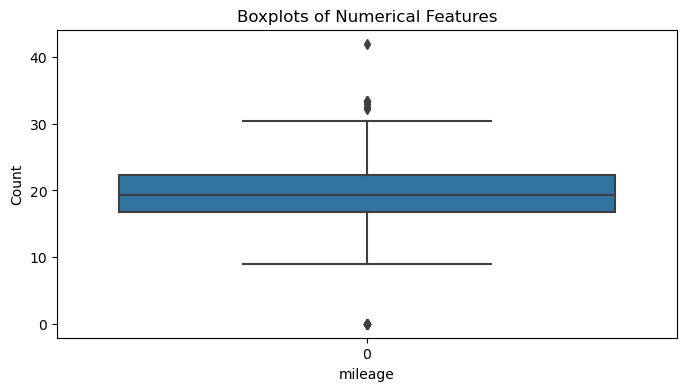

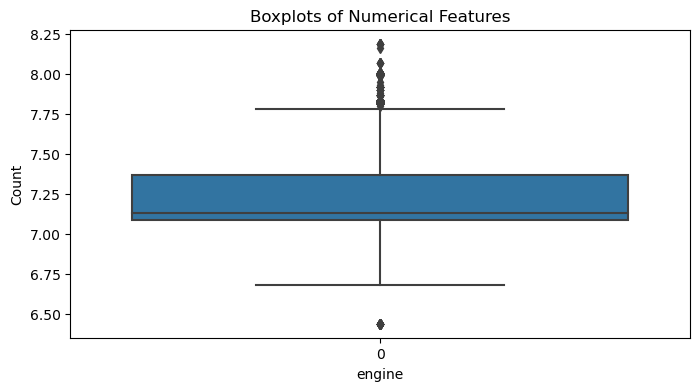

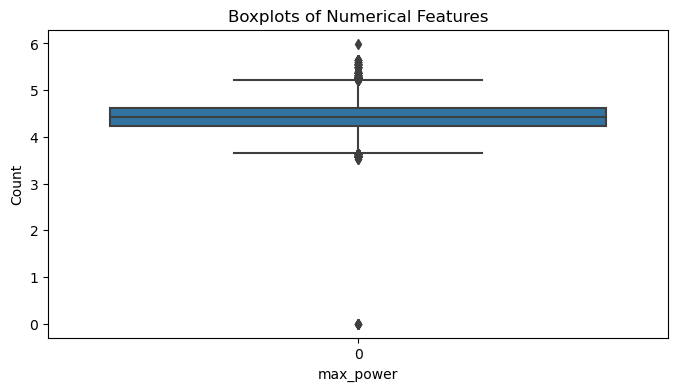

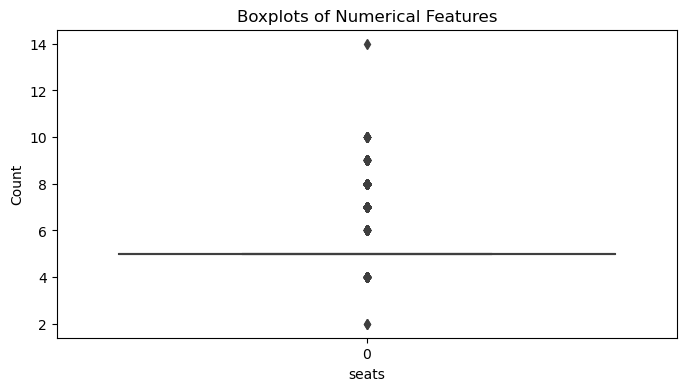

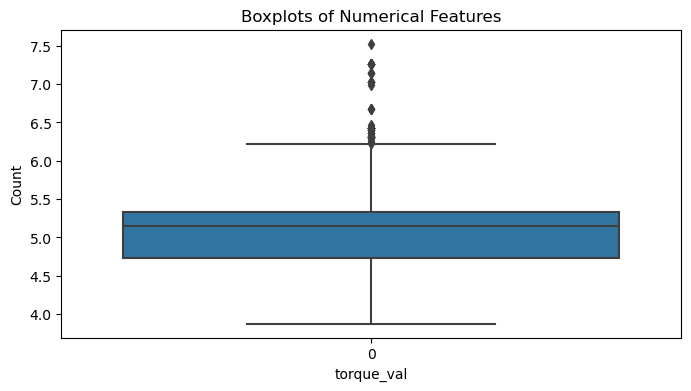

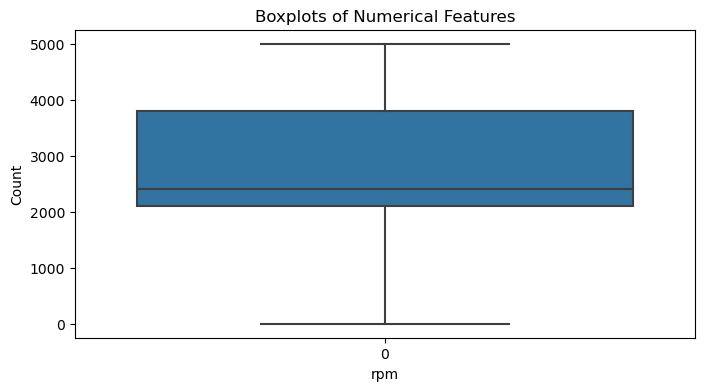

In [81]:
#box plot
for col in numerical_col:
    plt.figure(figsize = (8,4))
    sns.boxplot(data=car_resell[col])
    plt.title('Boxplots of Numerical Features')   
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

### Handling Outliers and Skewness

Handling outliers and skewness based on the distribution plots.

In [24]:
columns_with_skewness = ['km_driven','engine','max_power','torque_val']

#log transformation
for i in columns_with_skewness:
    car_resell[i] = np.log1p(car_resell[i])

In [25]:
#log transforming selling price
car_resell['log_selling_price'] = np.log1p(car_resell['selling_price'])

### Handling Missing Values

Filling in the missing values using median for numerical values and mode for categorical variables

In [31]:
#filling the numerical cols with median
car_resell['mileage'].fillna(car_resell['mileage'].median(), inplace=True)
car_resell['engine'].fillna(car_resell['engine'].median(), inplace=True)
car_resell['max_power'].fillna(car_resell['max_power'].median(), inplace=True)
car_resell['seats'].fillna(car_resell['seats'].median(), inplace=True)
car_resell['torque_val'].fillna(car_resell['torque_val'].median(), inplace=True)
car_resell['rpm'].fillna(car_resell['rpm'].median(), inplace=True)

In [32]:
#filling the categorical cols with the mode
car_resell["torque_unit"].fillna(car_resell["torque_unit"].mode()[0], inplace=True)

Rechecking the missing values count

In [33]:
car_resell.isnull().sum()

name                 0
year                 0
selling_price        0
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
torque_val           0
torque_unit          0
log_selling_price    0
rpm                  0
dtype: int64

### Removing unnecessary columns

This step prepares the dataset for model training. We're removing unnecessary columns and creating dummy variables for Categorical variables.

In [34]:
#dropping categorical columns like name and torque unit
car_resell = car_resell.drop(columns = ['name','torque_unit',"torque"],errors = 'ignore')

In [35]:
#creating dummy variables
categorical_col_for_dummy =['fuel','seller_type','transmission','owner']
car_resell = pd.get_dummies(car_resell, columns = categorical_col_for_dummy, drop_first=True)

In [36]:
car_resell.head()

year  selling_price  km_driven  mileage    engine  max_power  seats  \
0  2014         450000  11.887938    23.40  7.130099   4.317488    5.0   
1  2014         370000  11.695255    21.14  7.312553   4.649378    5.0   
2  2006         158000  11.849405    17.70  7.311886   4.369448    5.0   
3  2010         225000  11.751950    23.00  7.242082   4.510860    5.0   
4  2007         130000  11.695255    16.10  7.169350   4.490881    5.0   

   torque_val  log_selling_price     rpm  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0    5.252273          13.017005  2000.0         True     False        False   
1    5.525453          12.821261  2000.0         True     False        False   
2    4.832660          11.970357  2400.0        False     False         True   
3    5.396664          12.323860  2250.0         True     False        False   
4    4.734236          11.775297  2400.0        False     False         True   

   seller_type_Individual  seller_type_Trustmark Dealer  transmission_Manual  \
0                    True                         False                 True   
1                    True                         False                 True   
2                    True                         False                 True   
3                    True                         False                 True   
4                    True                         False                 True   

   owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                       False               False                 False   
1                       False                True                 False   
2                       False               False                 False   
3                       False               False                 False   
4                       False               False                 False   

   owner_Third Owner  
0              False  
1              False  
2               True  
3              False  
4              False

### Regression Model

In [59]:
X = car_resell.drop(["selling_price","log_selling_price"], axis = 1)
# y = car_resell["selling_price"]
y = car_resell["log_selling_price"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42 )

In [39]:
#Building the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Checking Assumptions for Linear Regression

After the model has been created, we check the model against the assumptions of Linear Regression. There are five differnt types of Linear Regression:

* Linear relationship between the target and predictors
* Homoscedasticity
* No multicollinearity
* Normally distributed errors or Normality of errors
* Indepedence of errors


In [40]:

# x_values = ['year', 'km_driven', 'mileage', 'engine', 'max_power',
#        'seats', 'torque_val', 'rpm','fuel_Diesel',
#        'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
#        'seller_type_Trustmark Dealer', 'transmission_Manual',
#        'owner_Fourth & Above Owner', 'owner_Second Owner',
#        'owner_Test Drive Car', 'owner_Third Owner']

x_values = ['year', 'km_driven', 'mileage', 'engine', 'max_power',
       'seats', 'torque_val', 'rpm','fuel_Diesel',
       'fuel_LPG','seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner']
X = car_resell[x_values]
y = car_resell['log_selling_price']

In [41]:
X_const = sm.add_constant(X)
X_const = X_const.astype('float')
model = sm.OLS(y,X_const).fit()

#### Linearity of target and predictor

The relationship between the independent (X) and dependent (y) variable should be linear. The changes in x should proportionally influence y. An easy way to check this is visually. We can use a scatter plot (for single variable) and a pair plot (for multiple variables). If the data points form a roughly straight line, then the model is good to go. However, if the data points form a curve, the model violates the assumption.

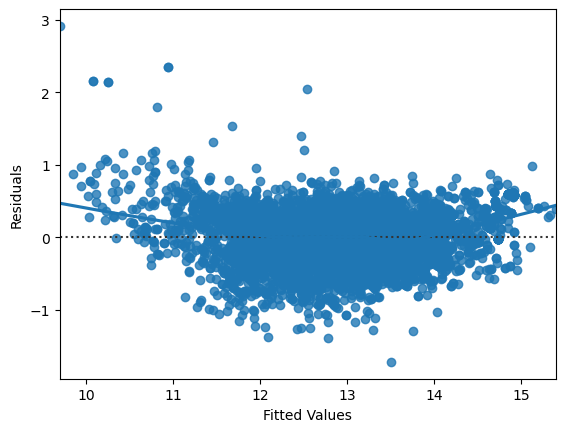

In [42]:
# Checking for Linearity or a Linear Relationship

#doing a residual vs fitted plot
fitted_vals = model.fittedvalues
residuals = model.resid

sns.residplot(x = fitted_vals, y= residuals, lowess = True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

#confirm assumption of Linear Relationship

Our residual vs fitted values plot shows a slight curve but the data points are densely scattered around the fitted values. Thus, we can confirm that the target and predictor variables have a linear relationship and passes the assumption for Linearity. 

#### Testing for Homoscedasticity

This means variance of errors (or residuals) should be constant across all levels of the predicted values. We can check for this assumption by plotting the residuals against the predicted values. It is great if the errors are spread evenly around zero across all levels of the predicted values and there is no funnel or fan shape pattern present. If there is a presence of a pattern, the assumption is violated.

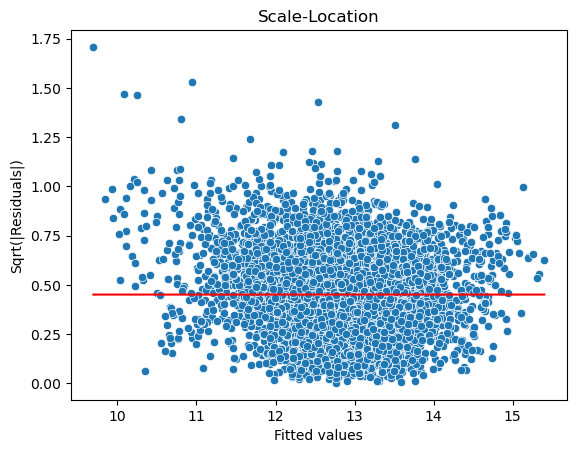

In [43]:
#Test for Homoscedasticity
resid_sqrt = np.sqrt(np.abs(residuals))
sns.scatterplot(x=fitted_vals, y=resid_sqrt)
sns.lineplot(x=fitted_vals, y=np.mean(resid_sqrt), color='red')
plt.xlabel("Fitted values")
plt.ylabel("Sqrt(|Residuals|)")
plt.title("Scale-Location")
plt.show()

Our residual plot shows that the resduals are spread out almost evenly against the predicted values. A clear pass for the assumption of Homoscedasticity.

We're also going to perform a statistical test to confirm this.

##### Goldfeld Quant test to check Homoscedasticity


    Null Hypothesis : Error terms are Homoscedastic
    Alternate Hypothesis : Error terms are not Homoscedastic

In [44]:
#test
from statsmodels.stats.diagnostic import het_goldfeldquandt 
test = het_goldfeldquandt(residuals,X_const)
print(f'Goldfed Quandt test:{test[0]}')
print(f'p-value: {test[1]}')

#high p-values means we cannot reject the null hypothesis. thus the error terms are not heteroscedastic

Goldfed Quandt test:0.9394455208465516
p-value: 0.9765110293334447


The p-value of our test is more than 0.05,thus, we can't reject our null hypothesis. Thus, the error terms are homoscedastic.

In [46]:
X_train.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'torque_val', 'rpm', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

#### No Multicollinearity

It is good if an independent variable is correlated to the dependent variable; that's how prediction works. If an independent variable is strongly correlated to another independent variable then it's called Multicollinearity. Having a strong multicollinearity amongst the independent variables violates the assumption of linear regression. Having predictors that are correlated to each other produces unstable estimates, increases the standard error, and makes it hard to interpret the importance of features. A correlation matrix or a Variance Inflation Factor can help detect strong multicollinearity.

In [53]:
# Multicollinearity test
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X_train.columns))]
print(vif_data)

                        Features       VIF
0                           year  2.314791
1                      km_driven  1.819727
2                        mileage  2.698185
3                         engine  6.052284
4                      max_power  4.437268
5                          seats  2.004454
6                     torque_val  8.451262
7                            rpm  3.425115
8                    fuel_Diesel  5.553141
9                       fuel_LPG  1.013224
10        seller_type_Individual  1.441323
11  seller_type_Trustmark Dealer  1.241785
12           transmission_Manual  1.562395
13    owner_Fourth & Above Owner  1.104726
14            owner_Second Owner  1.290257
15          owner_Test Drive Car  1.007691
16             owner_Third Owner  1.216645


VIF > 10 : Strong Multicollinearity
VIF > 5 : Moderate Multicollinearity
VIF < 5 : Not Strong Multicollinearity

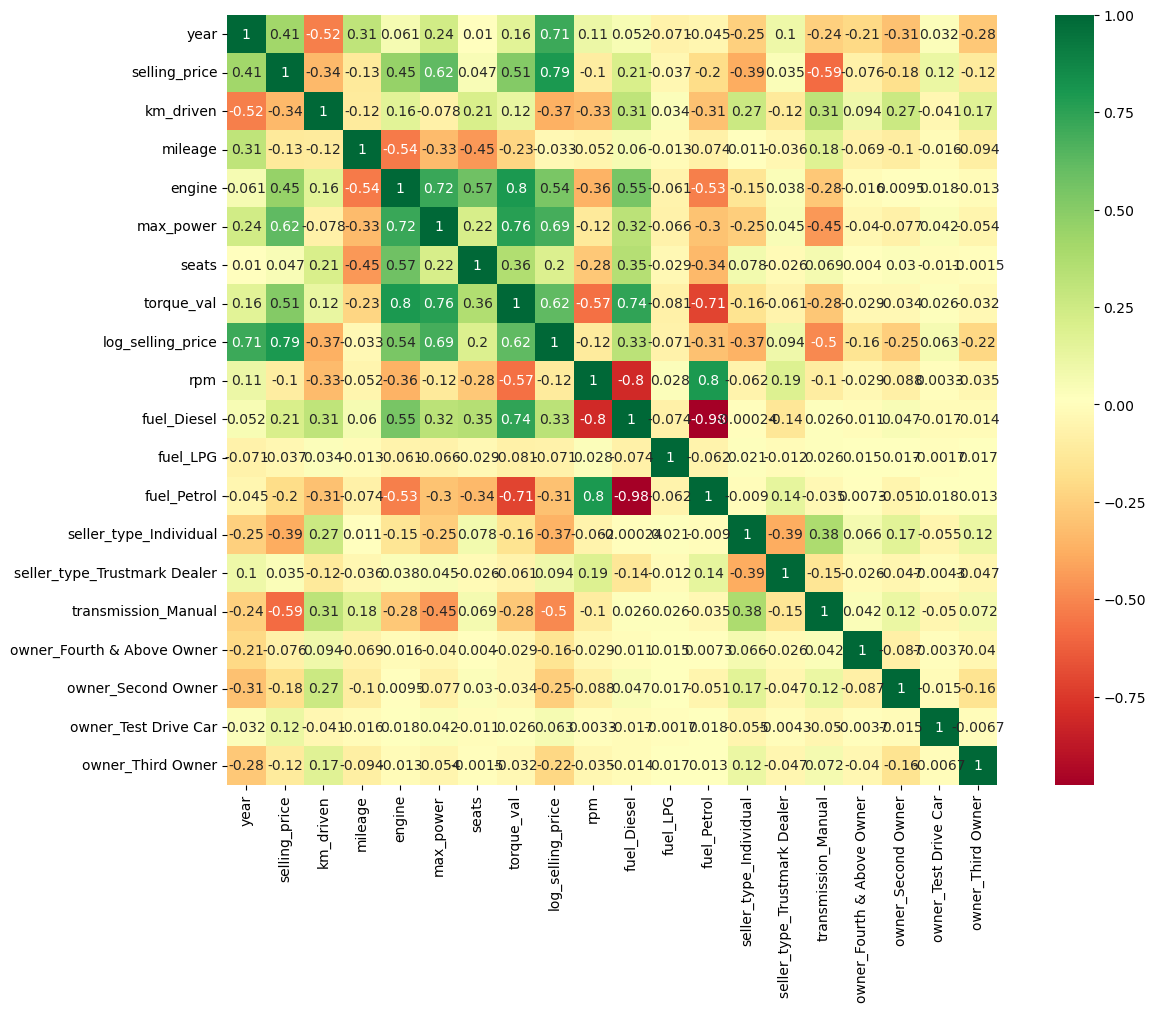

In [48]:
#checking multicollinearity using heatmap
plt.figure(figsize = (15,10))
sns.heatmap(car_resell.corr(),annot = True, cmap= 'RdYlGn', square = True)
plt.show()

Most variables have a moderate collinearity. Dropping dummy variables with high VIF, to test the impact on VIF.

In [49]:
#dropping one of fuel variables for reducing multi collinearity
car_resell.drop('fuel_Petrol', axis = 1, inplace= True)

In [76]:
#Running this again
X = car_resell.drop(["selling_price","log_selling_price"], axis = 1)
# y = car_resell["selling_price"]
y = car_resell["log_selling_price"]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42 )

In [78]:
car_resell.head()

year  selling_price  km_driven  mileage    engine  max_power  seats  \
0  2014         450000  11.887938    23.40  7.130099   4.317488    5.0   
1  2014         370000  11.695255    21.14  7.312553   4.649378    5.0   
2  2006         158000  11.849405    17.70  7.311886   4.369448    5.0   
3  2010         225000  11.751950    23.00  7.242082   4.510860    5.0   
4  2007         130000  11.695255    16.10  7.169350   4.490881    5.0   

   torque_val  log_selling_price     rpm  fuel_Diesel  fuel_LPG  \
0    5.252273          13.017005  2000.0         True     False   
1    5.525453          12.821261  2000.0         True     False   
2    4.832660          11.970357  2400.0        False     False   
3    5.396664          12.323860  2250.0         True     False   
4    4.734236          11.775297  2400.0        False     False   

   seller_type_Individual  seller_type_Trustmark Dealer  transmission_Manual  \
0                    True                         False                 True   
1                    True                         False                 True   
2                    True                         False                 True   
3                    True                         False                 True   
4                    True                         False                 True   

   owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                       False               False                 False   
1                       False                True                 False   
2                       False               False                 False   
3                       False               False                 False   
4                       False               False                 False   

   owner_Third Owner  
0              False  
1              False  
2               True  
3              False  
4              False

#### VIF Test again on the new dataframe

In [52]:
#checking vif again
# Multicollinearity test
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Features"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X_train.columns))]

print(vif_data)

                        Features       VIF
0                           year  2.314791
1                      km_driven  1.819727
2                        mileage  2.698185
3                         engine  6.052284
4                      max_power  4.437268
5                          seats  2.004454
6                     torque_val  8.451262
7                            rpm  3.425115
8                    fuel_Diesel  5.553141
9                       fuel_LPG  1.013224
10        seller_type_Individual  1.441323
11  seller_type_Trustmark Dealer  1.241785
12           transmission_Manual  1.562395
13    owner_Fourth & Above Owner  1.104726
14            owner_Second Owner  1.290257
15          owner_Test Drive Car  1.007691
16             owner_Third Owner  1.216645


Checking the correlation for variables like torque for multicollinearity, as they have a high VIF.

In [54]:
#checking correlation for other variables with high vif
car_resell[['torque_val','engine','max_power']].corr()

torque_val    engine  max_power
torque_val    1.000000  0.798763   0.760847
engine        0.798763  1.000000   0.720292
max_power     0.760847  0.720292   1.000000

Most variables have a moderate correlation indicating no strong multicollinearity. Thus, passing the "No multicollinearity" assumption of Linear Regression.

##### Normality of residuals or errors

The final assumption is regarding the normality of the errors. Why should our errors be normally distributed? Having normally distributed errors is important for interpreting the p-values, confidence intervals, and to perform hypothesis testing. The normality of errors ensures that the model's statistical conclusions are accurate and trustworthy for any further statistical interpretation. To find if errors are normally distributed, we can use a Q-Q plot or use a histogram.

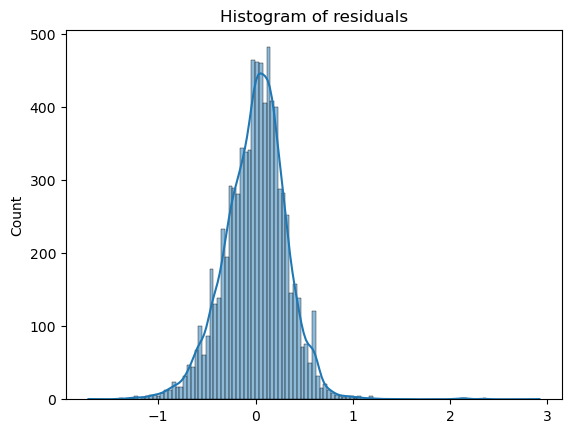

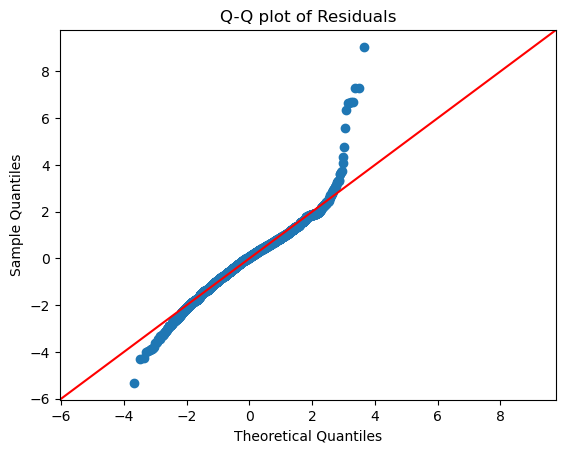

In [55]:
#normality of residuals

#checking the normal distribution of residuals
sns.histplot(residuals, kde = True)
plt.title("Histogram of residuals")
plt.show()

# qq plot
sm.qqplot(residuals, line = '45', fit = True)
plt.title('Q-Q plot of Residuals')
plt.show()


The residuals are roughly normally distributed with some skewness in the tails. If we manage the skewness by removing or log transforming the variables, it would be perfectly normal.

#### Independence of errors

The residuals or the errors should be independent of each other. In other words, they should not be correlated to each other over time, this phenomenon is called autocorrelation. We can opt for statistical tests such as Durbin Watson test to check if the errors are independent.

In [56]:
#autocorrelation of residuals
from statsmodels.stats.stattools import durbin_watson

dw_test = durbin_watson(residuals)
print(f'{dw_test}')

1.8082079169249325


The durbin watson is close to 2, so there is no autocorrelation. If the durbin watson test value was greater than 2 or less than 2, we would suggest the residuals to be autocorrelated.

### Checking the performance of the model based on RMSE, MAE, R2, and MSE

In [79]:
#fitting the model after removing the fuel petrol dummy variable
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [80]:
# model Performance
#evaluating the model
y_pred = model.predict(X_test)
print('R2 score :', r2_score(y_test,y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:',np.sqrt(mean_absolute_error(y_test, y_pred)))

R2 score : 0.845791081794021
Mean Squared Error:  0.10564574060941515
Root Mean Squared Error: 0.3250319070636222
Mean Absolute Error: 0.49590392722452076


# More things to do
* Feature engineering
* Cross validation 
* Testing more models
* Implementing the solution